In [26]:
from model.model import Model
import plot.single_run as plt
import imp
imp.reload(plt)

inputs = {
    'model' : {
        'n_agents' : 100,
        'T' : 10, # number of years to simulate
        'exp_name' : 'test',
        'seed' : 0,
        'sim_id' : 0,
        'rep_id' : 0,
    }, 
    'agents' : {
        # plot ownership
        'land_heterogeneity' : True, # heterogeneity in number of plots?
        'land_mean' : 5, # mean number of land parcels. if heterogeneous, use poisson distribution
        
        ##### cash + wealth #####
        # initial (normal distribution)
        'wealth_init_mean' : 100,
        'wealth_init_sd' : 0,
        # requirements
        'cash_req_mean' : 20,
        'cash_req_sd' : 0,
        # market prices
        'crop_sell_price' : 10,
    },
    'land' : {
        ##### SOM #####
        # initial vals
        'SOM_min_init' : 0.5, # sample from uniform dist
        'SOM_max_init' : 0.5,
        # soil model
        'mineralization_rate' : 0.1, # rate of mineralization from organic->inorganic (assume linear decay)
        'loss_max' : 0.5, # inorganic loss fraction with no SOM
        'loss_min' : 0.1, # inorganic loss fraction with maximum SOM
        'wealth_SOM_conversion' : 1/10, # conversion factor from wealth to SOM input (a proxy for livestock manure)
        ##### yield #####
        'max_yield' : 1, # maximum, unconstrained yield
        'rain_crit' : 0.8, # value at which rainfall starts to be limiting
        'rain_cropfail_high_SOM' : 0.1, # rainfall value at which crop yields are 0 with highest SOM
        'rain_cropfail_low_SOM' : 0.3, # rainfall value at which crop yields are 0 with lowest SOM
        'random_effect_sd' : 0.2, # std dev of yield multiplier effect (normal distribution, mu=1)
        'nitrogen_fraction' : 0.3, # fraction of total yield that comes from SOM (e.g. if 0.3 then the yield can't be more than inorganic/0.3)
    },
    'climate' : {
        # annual climate measure -- assume normal distribution (truncated to [0,1])
        'rain_mu' : 0.8,
        'rain_sd' : 0.05,
    }
}

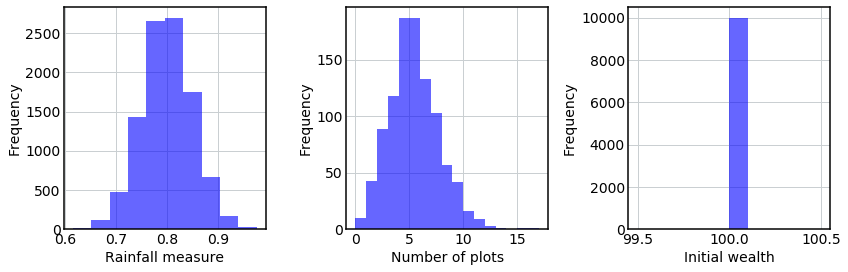

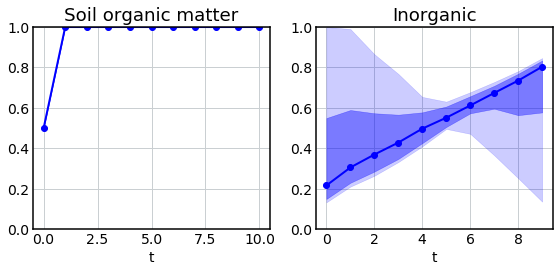

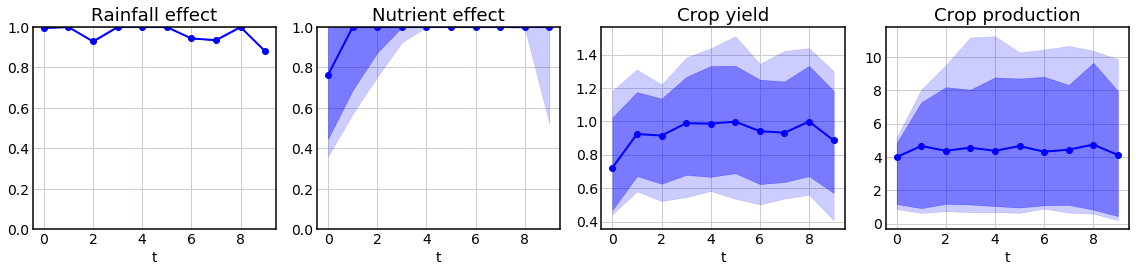

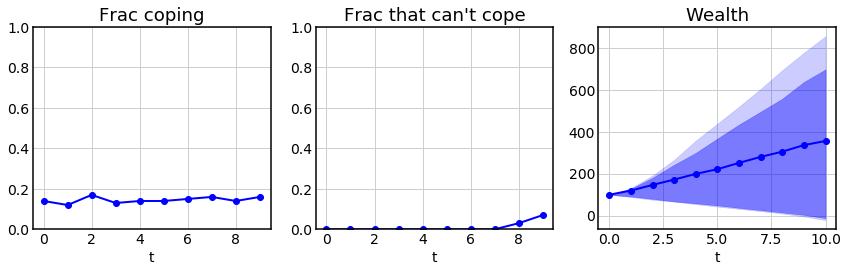

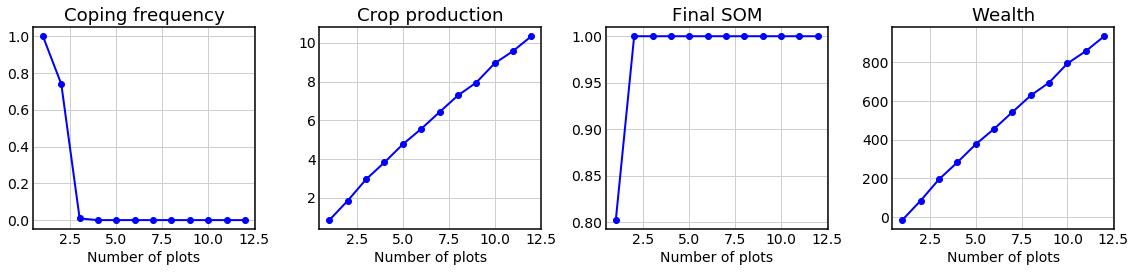

In [27]:
m = Model(inputs)
for t in range(m.T):
    m.step()
plt.main(m, save=False)